In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [3]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')

In [4]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtclf=DecisionTreeClassifier()

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [7]:
data=pd.read_excel('iris.xls')

In [8]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.shape

(150, 5)

In [11]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [12]:
for col in['SL','SW','PL']:
    data[col] = data[col].fillna(data[col].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Outliers

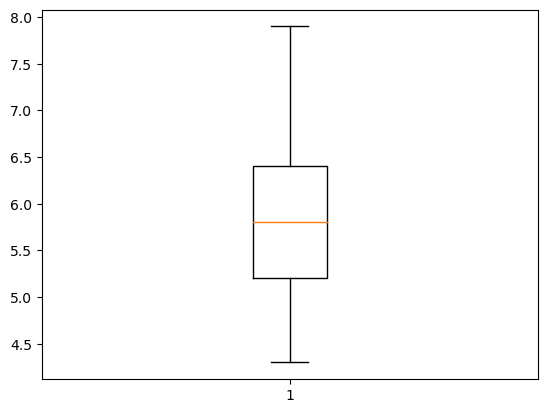

In [14]:
plt.boxplot(data['SL'])
plt.show()

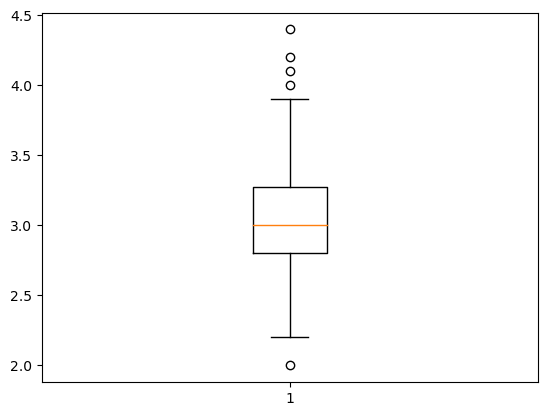

In [15]:
plt.boxplot(data['SW'])
plt.show()

In [16]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

In [17]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [18]:
IQR = Q3-Q1

In [19]:
print(IQR)

0.4500000000000002


In [20]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [21]:
print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [22]:
outliers = []
for i in data['SW']:
    if i>up_lim or i<low_lim:
        outliers.append(i)

In [23]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [24]:
ind = data['SW']>up_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [25]:
data = data.drop([14, 15, 32, 33])

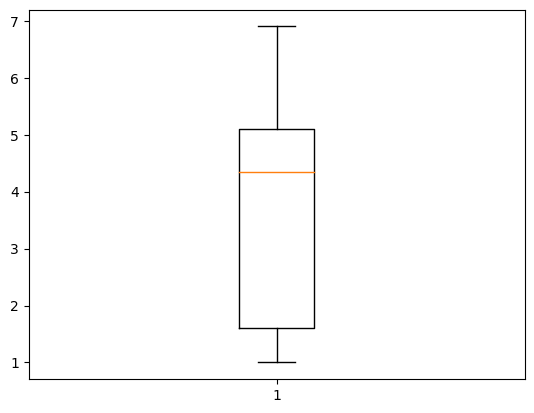

In [26]:
plt.boxplot(data['PL'])
plt.show()

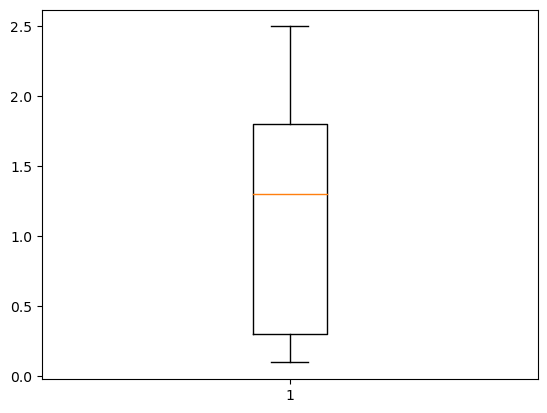

In [27]:
plt.boxplot(data['PW'])
plt.show()

In [28]:
data['Classification'].nunique()

3

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
Le=LabelEncoder()

In [31]:
x=data.drop('Classification',axis=1)

In [32]:
y=data['Classification']

In [33]:
x.head()


,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
num_cols=[ 'SL', 'SW', 'PL','PW']

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

# MINMAX

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
min_max=MinMaxScaler(feature_range=(0,1))

In [37]:
x.loc[:,num_cols]=min_max.fit_transform(x.loc[:,num_cols])

In [38]:
x.head()

,SL,SW,PL,PW
0,0.222222,0.789474,0.067797,0.041667
1,0.166667,0.526316,0.067797,0.041667
2,0.416667,0.631579,0.050847,0.041667
3,0.083333,0.578947,0.084746,0.041667
4,0.194444,0.842105,0.067797,0.041667


In [39]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
corrmatrix=data.corr()

# Linear regression

<AxesSubplot:>

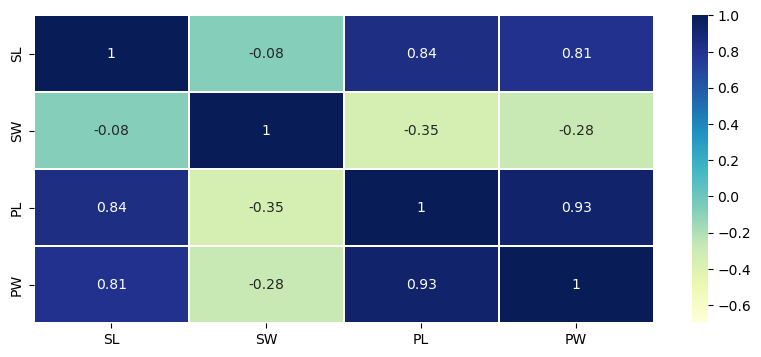

In [41]:
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.7,vmax=1,linewidth=0.2,cmap='YlGnBu')

In [51]:
y=data['Classification']
x=data.drop('Classification',axis=1)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [53]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [54]:
model=lr.fit(x_train,y_train)

In [55]:
y_pred=model.predict(x_test)

In [56]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,y_pred))

MSE is 0.04868594195940339


In [57]:
from sklearn.metrics import r2_score
print('R squared value is ',r2_score(y_test,y_pred))

R squared value is  0.9332052625556966


In [59]:
model.predict([[2,3,4.5,2.2]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.91464779])

# Logical regression

In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [61]:
lr.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred=lr.predict(x_test)

In [63]:

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [65]:
print('Accuracy=',accuracy_score(y_test,y_pred))


Accuracy= 0.9333333333333333


In [66]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# SVM model

In [67]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')

In [68]:
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [69]:
y_pred=svmclf.predict(x_test)

In [71]:
print('Accuracy=',accuracy_score(y_test,y_pred))

Accuracy= 0.9666666666666667


In [72]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

# Decision tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtclf=DecisionTreeClassifier()

In [74]:
dtclf.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
y_pred=dtclf.predict(x_test)

In [76]:
print('Accuracy=',accuracy_score(y_test,y_pred))

Accuracy= 0.9333333333333333


In [77]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
y_pred=dtclf.predict(x_test)

In [81]:
print('Accuracy=',accuracy_score(y_test,y_pred))

Accuracy= 0.9333333333333333


In [82]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# Random forest with n trees

In [83]:
rf1=RandomForestClassifier(n_estimators=205,max_depth=20,criterion='entropy',min_samples_split=3)

In [84]:
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=205)

In [85]:
y_pred=dtclf.predict(x_test)

In [86]:
print('Accuracy=',accuracy_score(y_test,y_pred))

Accuracy= 0.9333333333333333


In [87]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)